# Stock Portfolio Project

# Introduction 

An investment portfolio can be defined as a collection of financial investments like stocks, bonds, exchange traded funds and cash which are assembled for the purpose of long-term returns. Typically, an investor would compose their portfolio in a way in which the profits are maximized while the risk remains low. In this project, we perform an in-sample optimisation of trading portfolios, based on the stocks which have been in the S&P 500 in the last 16 years. The S&P 500 is a market capitalization weighted index which tracks the stocks of the 500 large cap publicly traded stocks in the United States. Market capitalization of a stock is the total value of all the shares of a stock a company has issued. This can be calculated by multiplying the amount of shares issued by the company by the price of the stock. As the market cap of a company is dynamic, over time the companies listed on the S&P 500 change as companies fall and rise into the top 500. The data we investigated contained the adjusted daily close price of each of the 500 companies listed in the S&P 500 for a 16 year period. However, as different companies move in and out of the S&P 500 when reviewing the data of the past 16 years we were actually left with 1199 companies. 


In [1]:
import calculations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv("../adjusted_price_data.csv", parse_dates=True, index_col="Date").dropna(how="all", axis=0).dropna(how="all", axis=1)
data

0111145D US Equity  0202445Q US Equity  0203524D US Equity  \
Date                                                                     
1993-09-07             13.2719             13.6829              8.4429   
1993-09-08             13.3263             13.5315              8.2147   
1993-09-09             13.7070             13.3800              8.7852   
1993-09-10             13.3807             13.4810              9.4127   
1993-09-11             13.3807             13.4810              9.4127   
...                        ...                 ...                 ...   
2019-07-27                 NaN                 NaN                 NaN   
2019-07-28                 NaN                 NaN                 NaN   
2019-07-29                 NaN                 NaN                 NaN   
2019-07-30                 NaN                 NaN                 NaN   
2019-07-31                 NaN                 NaN                 NaN   

            0226226D US Equity  0376152D US Equity  0440296D US Equity  \
Date                                                                     
1993-09-07              8.1042              11.000             57.3245   
1993-09-08              7.9590              11.000             57.2096   
1993-09-09              8.0627              11.125             59.1625   
1993-09-10              8.0368              11.125             59.6220   
1993-09-11              8.0368              11.125             59.6220   
...                        ...                 ...                 ...   
2019-07-27                 NaN                 NaN                 NaN   
2019-07-28                 NaN                 NaN                 NaN   
2019-07-29                 NaN                 NaN                 NaN   
2019-07-30                 NaN                 NaN                 NaN   
2019-07-31                 NaN                 NaN                 NaN   

            0544749D US Equity  0574018D US Equity  0598884D US Equity  \
Date                                                                     
1993-09-07             17.8887              6.8315             28.1246   
1993-09-08             17.8064              6.8315             27.5051   
1993-09-09             17.6831              6.8315             27.7529   
1993-09-10             17.6420              6.8773             27.5051   
1993-09-11             17.6420              6.8773             27.5051   
...                        ...                 ...                 ...   
2019-07-27                 NaN                 NaN                 NaN   
2019-07-28                 NaN                 NaN                 NaN   
2019-07-29                 NaN                 NaN                 NaN   
2019-07-30                 NaN                 NaN                 NaN   
2019-07-31                 NaN                 NaN                 NaN   

            0772031D US Equity  0820143D US Equity  0848680D US Equity  \
Date                                                                     
1993-09-07                 NaN             17.0742              9.2351   
1993-09-08                 NaN             16.8567              9.0167   
1993-09-09                 NaN             16.8567              9.0791   
1993-09-10                 NaN             16.6392              9.0479   
1993-09-11                 NaN             16.6392              9.0479   
...                        ...                 ...                 ...   
2019-07-27                 NaN                 NaN                 NaN   
2019-07-28                 NaN                 NaN                 NaN   
2019-07-29                 NaN                 NaN                 NaN   
2019-07-30                 NaN                 NaN                 NaN   
2019-07-31                 NaN                 NaN                 NaN   

            0867887D US Equity  0872237D US Equity  0910150D US Equity  \
Date                                                                     
1993-09-07  

In [3]:
start_date="1993/09/07"
end_date="1994/09/07"

timeframe = data[start_date:end_date]

## Returns
The returns is simply the money made or loss over a period of time. Returns can be calculated by determining the increase in the value of the portfolio. In order to find the returns for an individual stock we can use the equation (final value/initial value) -1 which would give us the return on investment of each stock. It is important that the returns are measured on a percentage changed basis as it makes it easy to compare the returns of a variety of companies. Since a key focus for investors is to maximize their profits, returns is undoubtably a key variable in determining an optimized portfolio. 


## Measures of Risk 
*Portfolio risk is determined by the combined risk of each individual investment within the portfolio. The extent to which the portfolio is exposed to various risks is affected by the different components of the portfolio and the weights associated to them. When it comes to measuring the risk in a portfolio there are several different approaches, all with their own advantages and drawbacks. Common methods include:*

## Volatility
Volatility is the rate at which prices of a security increases or decrease for a given set of returns. It is determined by calculating the standard deviation of the annualized returns over a given period which conveys the range to which the price of a security may fluctuate. If the prices of a security fluctuate rapidly in a short time span, it is termed to have high volatility. If the prices of a security fluctuate slowly in a longer time span, it is termed to have low volatility. 

## Value at Risk
Value at risk can be defined as the maximum dollar amount expected to be lost over a given time frame, at a pre-defined confidence level. In order to calculate the value at risk we utilized the historical method which includes stack ranking the historical returns from low to high within the desired time period and then calculating the lowest 5% of returns, and then we use the highest value of that lowest 5%, assuming that we are calculating a 95% confidence interval. Hence, if a portfolio has a 95% confidence value at risk of 5, there is a 95% chance that the portfolio will have a return of more than -5%. 

## Expected Shortfall
Like the Value at risk the expected shortfall is the dollar amount expected to be lost over a given time frame, at a pre-defined confidence level. However, unlike value at risk, expected shortfall is calculated by averaging all the returns in the distribution that are worse than the value at risk of the portfolio at a given level of confidence. Simply putting it, when looking at a normal distribution curve, for a confidence of 95%, the value at risk is equal to the value at 5th percentile, while the expected shortfall is the average value of the area below the 5th percentile.

## Sharpe Ratio
Sharpe ratio is the returns on investment adjusted for volatility or the risk-free return of a stock. The higher a fund's Sharpe ratio, the better its returns have been relative to the amount of investment risk it has taken. It is calculated by subtracting the risk-free rate from the returns and dividing that by the standard deviation of the portfolio’s excess return. As optimal stocks provide high returns while bearing low risks, the Sharpe ratio provides a large insight on the optimisation of a portfolio. As a general rule, stocks with a Sharpe ratio greater than 2 can be deemed good stocks. 

In [4]:
value_at_risk = calculations.value_at_risk(timeframe, 1-0.95)
expected_shortfall = calculations.expected_shortfall(timeframe, 1-0.95)
returns=(timeframe.iloc[-1]/timeframe.iloc[0])-1
stocks_var = timeframe.std()/timeframe.iloc[0,1:] 

In [5]:
sharpe_ratio = calculations.sharpe_ratio(timeframe)
sharpe_ratio.sort_values(ascending=False)

365


1530Q US Equity       2.793745
PCP US Equity         2.610292
2987536Q US Equity    2.516315
1423Q US Equity       2.465332
COMS US Equity        2.311816
                        ...   
YUM US Equity              NaN
YUMC US Equity             NaN
ZBH US Equity              NaN
ZTS US Equity              NaN
ZTS-W US Equity            NaN
Length: 1199, dtype: float64

In [6]:
print("Value at Risk")
value_at_risk.sort_values(ascending=False)
print("\nExpected Shortfall")
expected_shortfall.sort_values(ascending=False)
print("\nReturns")
returns.sort_values(ascending=False)

Value at Risk


YRCW US Equity     109471.2510
FWLT US Equity        261.5419
AIG US Equity         187.4497
MZIAQ US Equity       147.2233
2223Q US Equity       101.9406
                      ...     
YUM US Equity              NaN
YUMC US Equity             NaN
ZBH US Equity              NaN
ZTS US Equity              NaN
ZTS-W US Equity            NaN
Name: 0.050000000000000044, Length: 1199, dtype: float64


Expected Shortfall


YRCW US Equity     107399.391944
FWLT US Equity        254.014312
AIG US Equity         186.115872
MZIAQ US Equity       145.207941
2223Q US Equity        99.160768
                       ...      
YUM US Equity                NaN
YUMC US Equity               NaN
ZBH US Equity                NaN
ZTS US Equity                NaN
ZTS-W US Equity              NaN
Length: 1199, dtype: float64


Returns


COO US Equity         7.999818
HOLX US Equity        3.272886
WDC US Equity         1.999954
2987536Q US Equity    1.652075
COMS US Equity        1.591076
                        ...   
YUM US Equity              NaN
YUMC US Equity             NaN
ZBH US Equity              NaN
ZTS US Equity              NaN
ZTS-W US Equity            NaN
Length: 1199, dtype: float64

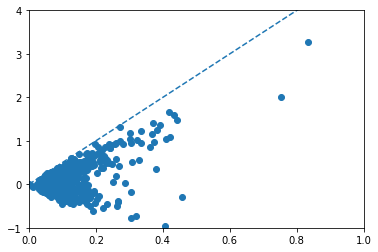

In [7]:
plt.scatter(stocks_var,returns)
plt.plot([0,1],[0,5],ls='--'); 
plt.xlim([.0,1]);
plt.ylim([-1,4]);

This graph demonstrates the relationship between the volatility and returns. Volatility is how rapidly or severely the price of an investment may change. As we intend to find stocks with a balance of returns and volatility the best performing stocks lie on the line. 

/home/brandon/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/brandon/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


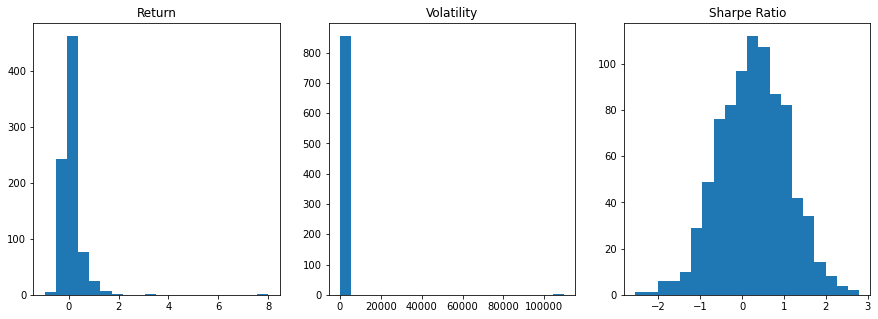

In [8]:
figure, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].hist(returns, 20); 
axs[0].set_title("Return");
axs[1].hist(value_at_risk, 20);
axs[1].set_title("Volatility");
axs[2].hist(sharpe_ratio, 20);
axs[2].set_title("Sharpe Ratio");

Histograms make the data easy for visual analysis as it presents how the data is distributed. The primary focus of sorting the data in such a manner is to be able to quickly identify any significant outliers as well as finding the average and pattern in the data. We can see that most of the stocks have a Sharpe ratio between 0 and 1 which is in line with what we expect to see. Generally, stocks with a Sharpe ratio above 1 are considered good and above 2 being very good. By sorting them in a histogram we are able to see the amount of stocks which can be seen as good performing stocks.   

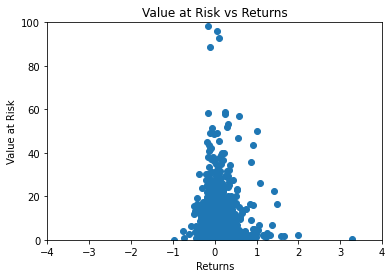

In [9]:
plt.scatter(returns, value_at_risk)
plt.xlim([-4, 4]);
plt.ylim([0, 100]);
plt.xlabel("Returns");
plt.ylabel("Value at Risk");
plt.title("Value at Risk vs Returns");

This graph is indicative of the relationship between the value at risk and returns of each individual stock. As the value at risk is a measure of amount you could possibly lose the best performing stocks are located in the bottom right as they promote high return and a low value at risk. Hence, we expect to see those stocks in the most optimized portfolio.

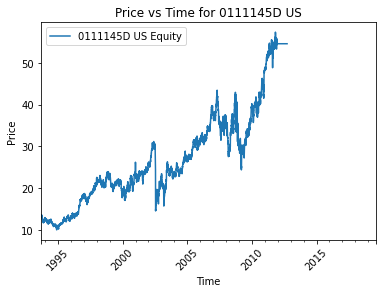

In [10]:
data.plot(y="0111145D US Equity");
plt.xlabel("Time");
plt.ylabel("Price");
plt.xticks(rotation=45);
plt.title("Price vs Time for 0111145D US");

This time series of an individual stock demonstrates the performance of the stock over a certain time period. A graph of such manner is indicative of the long-term performance of the stock. As we do not intend to allow constant buying and selling of stocks we only need to focus on where each stock starts and ends. However, if we were to allow constant buying and selling, then we would sell at peaks and buy at troughs.  

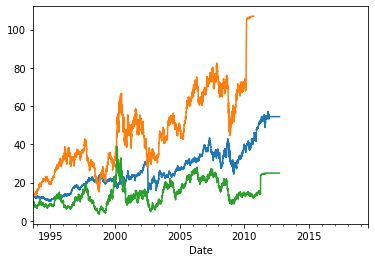

In [12]:
data["0111145D US Equity"].plot(label="0111145D US Equity");
data["0202445Q US Equity"].plot(label="202445Q US Equity");
data["0203524D US Equity"].plot(label="0203524D US Equity");

This graph is an indicator of the individual performance of each of the individual stocks in the portfolio. We aim to observe the long-term trend of such graph as it demonstrates the performance of our portfolio. Assuming that all of the stocks in the portfolio hold an equal weight, the overall trend of the portfolio would be equal to the sum of all the stocks in that portfolio.

In [13]:
indicator_data = {'Returns': returns,
        'Sharpe Ratio': sharpe_ratio ,
       'Value at Risk': value_at_risk,
       'Expected Shortfall': expected_shortfall}

indicators= pd.DataFrame (indicator_data, columns = ['Returns','Sharpe Ratio','Value at Risk', 'Expected Shortfall'])
sort_by_returns = indicators.sort_values('Returns',ascending=False)

print(sort_by_returns)

                     Returns  Sharpe Ratio  Value at Risk  Expected Shortfall
COO US Equity       7.999818     -0.855243         0.6406            0.560525
HOLX US Equity      3.272886           NaN         0.4844            0.461925
WDC US Equity       1.999954      2.099067         2.1437            2.059950
2987536Q US Equity  1.652075      2.516315         1.5938            1.548474
COMS US Equity      1.591076      2.311816         1.5305            1.396400
...                      ...           ...            ...                 ...
YUM US Equity            NaN           NaN            NaN                 NaN
YUMC US Equity           NaN           NaN            NaN                 NaN
ZBH US Equity            NaN           NaN            NaN                 NaN
ZTS US Equity            NaN           NaN            NaN                 NaN
ZTS-W US Equity          NaN           NaN            NaN                 NaN

[1199 rows x 4 columns]
